In [1]:
import sys
import cv2
import matplotlib.pyplot as plt
import numpy as np

sys.path.insert(0, "..")

import scipy.signal

from im_processing_fct.functions import *

import random

In [2]:

PathTemp = Path(
    "/mnt/labserver/DURRIEU_Matthias/Experimental_data/TrackingFiles/BackgroundImages/outer_arena_MultinazeBiS_Spacer/MultiMazeBiS_Empty/Spacer/221206/095129_s0a0_p6-0/Sample/MultiMaze_Spacer_Template.jpg")
VideoPath = Path(
    '/mnt/labserver/DURRIEU_Matthias/Experimental_data/Optogenetics/Optobot/MultiMazeBiS_15_Steel_Wax/Female_Starved_noWater/221116/102044_s0a0_p6-0/Small_Arena4/Arena4.mp4')

In [65]:
# Mac paths :

VideoPath = Path("/Users/ulric/Desktop/SampleDataMMTrack/Small_Arena6/Arena6.mp4")

# Get the first frame

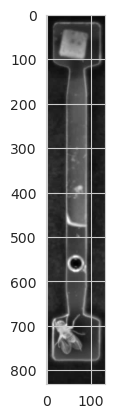

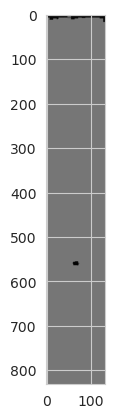

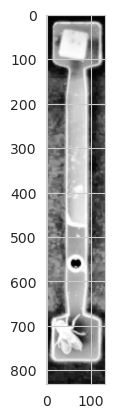

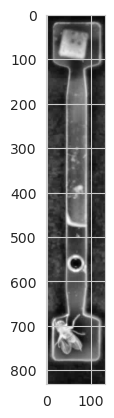

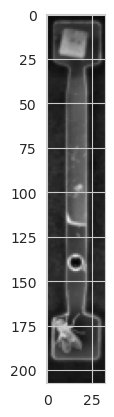

In [3]:

vidcap = cv2.VideoCapture(VideoPath.as_posix())
for i in range(1):
    success, im_full = vidcap.read()

im_full_gray = cv2.cvtColor(im_full, cv2.COLOR_BGR2GRAY)

plt.figure()
plt.imshow(im_full_gray, cmap='gray', vmin=0, vmax=255)

# Tryin uniform lighting
# Nathan solution
im_full_gray_unif = uniform_illumination(im_full_gray, bin_thresh=10)

plt.figure()
plt.imshow(im_full_gray_unif, cmap='gray', vmin=0, vmax=255)
# equalize hist

im_full_gray_eqh = cv2.equalizeHist(im_full_gray,)

plt.figure()
plt.imshow(im_full_gray_eqh, cmap='gray', vmin=0, vmax=255)

# Adaptive equalization

clahe = cv2.createCLAHE(clipLimit=2.0,
                        tileGridSize=(8,8))
im_full_gray_clahe = clahe.apply(im_full_gray,)

plt.figure()
plt.imshow(im_full_gray_clahe, cmap='gray', vmin=0, vmax=255)


im_full_gray_resized = cv2.resize(im_full_gray, (int(im_full_gray.shape[1] / rescaling_factor),
                                                 int(im_full_gray.shape[0] / rescaling_factor)),
                                  interpolation=cv2.INTER_AREA)

plt.figure()
plt.imshow(im_full_gray_resized, cmap='gray', vmin=0, vmax=255)

In [419]:
ctns = cv2.findContours(im_full_gray_clahe, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
ctns = ctns[0] if len(ctns) == 2 else ctns[1]

In [422]:
for c in ctns :
    cv2.drawContours(im_full_gray_clahe, [c], 0, (255,255,255), -1)

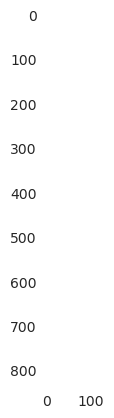

In [423]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (20,20))
opening = cv2.morphologyEx(im_full_gray_clahe, cv2.MORPH_OPEN, kernel, iterations=2)

plt.imshow(im_full_gray_clahe, cmap='gray', vmin=0, vmax=255)

# Find the ball

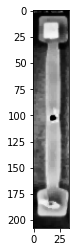

In [70]:
# Erode and dilate kernel to remove small noise that could be detected as ball

kernel= np.ones((2,2), np.uint8)
denoised = cv2.erode(im_full_gray_resized, kernel, iterations = 2)
denoised = cv2.dilate(denoised, kernel, iterations = 1)




plt.imshow(denoised, cmap='gray', vmin=0, vmax=255)


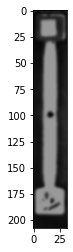

In [9]:
# Reduce the noise to avoid false circle detection

filt = cv2.GaussianBlur(im_full_gray_resized, (5,5), 0)
plt.imshow(filt, cmap='gray', vmin=0, vmax=255)

In [405]:
im_full_gray_resized = cv2.resize(im_full_gray, (int(im_full_gray.shape[1] / rescaling_factor),
                                                 int(im_full_gray.shape[0] / rescaling_factor)),
                                  interpolation=cv2.INTER_AREA)
#filt = cv2.medianBlur(im_full_gray_resized, 5)
rows = filt.shape[0]
circles = cv2.HoughCircles(filt, cv2.HOUGH_GRADIENT, 1, 125,
                           param1=40, param2=15,
                           minRadius=5, maxRadius=8)

In [406]:
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle center
        cv2.circle(im_full_gray_resized, center, 1, (0, 100, 100), 3)
        # circle outline
        radius = i[2]
        cv2.circle(im_full_gray_resized, center, radius, (255, 0, 255), 3)

In [407]:
cv2.imshow("detected circles", im_full_gray_resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x7fce08001220) is not the object's thread (0x46e83e0).
Cannot move to target thread (0x7fce08001220)

QObject::moveToThread: Current thread (0x7fce08001220) is not the object's thread (0x46e83e0).
Cannot move to target thread (0x7fce08001220)

QObject::moveToThread: Current thread (0x7fce08001220) is not the object's thread (0x46e83e0).
Cannot move to target thread (0x7fce08001220)

QObject::moveToThread: Current thread (0x7fce08001220) is not the object's thread (0x46e83e0).
Cannot move to target thread (0x7fce08001220)

QObject::moveToThread: Current thread (0x7fce08001220) is not the object's thread (0x46e83e0).
Cannot move to target thread (0x7fce08001220)

QObject::moveToThread: Current thread (0x7fce08001220) is not the object's thread (0x46e83e0).
Cannot move to target thread (0x7fce08001220)

QObject::moveToThread: Current thread (0x7fce08001220) is not the object's thread (0x46e83e0).
Cannot move to target thread (0x7fce08001220)

QObjec

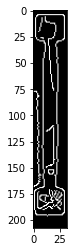

In [67]:
im_full_gray_resized = cv2.resize(im_full_gray_eqh, (int(im_full_gray.shape[1] / rescaling_factor),
                                                 int(im_full_gray.shape[0] / rescaling_factor)),
                                  interpolation=cv2.INTER_AREA)
# Erode and dilate kernel to remove small noise that could be detected as ball

kernel= np.ones((2,2), np.uint8)
denoised = cv2.erode(im_full_gray_resized, kernel, iterations = 3)
denoised = cv2.dilate(denoised, kernel, iterations = 2)
# Reduce the noise to avoid false circle detection

filt = cv2.GaussianBlur(im_full_gray_resized, (5,5), 0)

plt.imshow(filt, cmap='gray', vmin=0, vmax=255)

param1=200
param2=8

Edges = cv2.Canny(filt,param1, param2 )
plt.imshow(Edges, cmap='gray', vmin=0, vmax=255)


rows = filt.shape[0]
circles = cv2.HoughCircles(filt, cv2.HOUGH_GRADIENT, 1, 125,
                           param1=param1, param2=param2,
                           minRadius=0, maxRadius=3)

#Works with arena3 with clahe denoised and filtered image but failed on subsequent tests
#Works with area1 with unif denoised filtered image (mind the radius). Denoised was critical here.Also worked almost right away with arena2 changing only param2 from 10 to 9

# With hardcore uniform function only ball is visible and can be tracked with the transform on arena3. Makes too many "circle-ish" shapes.

# Eqh is promising with arena1.

# Eqh + radius control very narrow + no denoise works for Arena1, 2,3, 4, 5,6  oyeah


In [68]:

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle center
        cv2.circle(im_full_gray_resized, center, 1, (0, 100, 100), 3)
        # circle outline
        radius = i[2]
        cv2.circle(im_full_gray_resized, center, radius, (0, 255, 255), 3)
cv2.imshow("detected circles", im_full_gray_resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Try it on one arena but all video

In [72]:
Vidcap = cv2.VideoCapture(VideoPath.as_posix())

last = 0

while True:
    ret, frame = Vidcap.read() # Grab frame
    this = Vidcap.get(1)
    if ret == True:

        #frame = cv2.resize(frame, None, fx=scaling, fy=scaling,
        #interpolation=cv2.INTER_LINEAR)

        im_full_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) # convert to grayscale
        im_full_gray_eqh = cv2.equalizeHist(im_full_gray,)



        im_full_gray_resized = cv2.resize(im_full_gray, (int(im_full_gray.shape[1] / rescaling_factor),
                                                         int(im_full_gray.shape[0] / rescaling_factor)),
                                          interpolation=cv2.INTER_AREA)
                # (height, width) = frame.shape[:2]

        filt = cv2.GaussianBlur(im_full_gray_resized, (5,5), 0)


        param1=200
        param2=8



        rows = filt.shape[0]
        circles = cv2.HoughCircles(filt, cv2.HOUGH_GRADIENT, 1, 125,
                                   param1=param1, param2=param2,
                                   minRadius=0, maxRadius=3)

        if circles is not None:
            circles = np.uint16(np.around(circles))
            for i in circles[0, :]:
                center = (i[0], i[1])
                # circle center
                cv2.circle(im_full_gray_resized, center, 1, (0, 100, 100), 3)
                # circle outline
                radius = i[2]
                cv2.circle(im_full_gray_resized, center, radius, (0, 255, 255), 3)
        cv2.imshow("detected circles", im_full_gray_resized)



        if cv2.waitKey(1) == 27:
            exit(0)
    if last >= this:
        break
    last = this
Vidcap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

# Try with same params, different image

In [70]:

cv2.destroyAllWindows

<function destroyAllWindows>

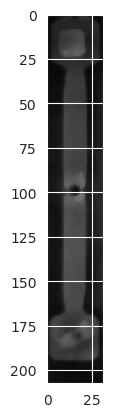

In [380]:
PathTemp = Path(
    "/mnt/labserver/DURRIEU_Matthias/Experimental_data/TrackingFiles/BackgroundImages/outer_arena_MultinazeBiS_Spacer/MultiMazeBiS_Empty/Spacer/221206/095129_s0a0_p6-0/Sample/MultiMaze_Spacer_Template.jpg")
VideoPath = Path(
    '/mnt/labserver/DURRIEU_Matthias/Experimental_data/Optogenetics/Optobot/MultiMazeBiS_15_Steel_Wax/Female_Starved_noWater/221116/102044_s0a0_p6-0/Small_Arena1/Arena1.mp4')
vidcap = cv2.VideoCapture(VideoPath.as_posix())
for i in range(1):
    success, im_full = vidcap.read()

im_full_gray = cv2.cvtColor(im_full, cv2.COLOR_BGR2GRAY)

plt.figure()
plt.imshow(im_full_gray, cmap='gray', vmin=0, vmax=255)

im_full_gray_resized = cv2.resize(im_full_gray, (int(im_full_gray.shape[1] / rescaling_factor),
                                                 int(im_full_gray.shape[0] / rescaling_factor)),
                                  interpolation=cv2.INTER_AREA)

filt = cv2.medianBlur(im_full_gray_resized, 5)

plt.imshow(filt, cmap='gray', vmin=0, vmax=255)


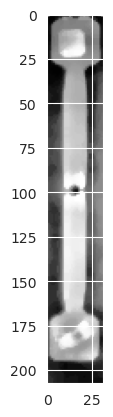

In [282]:
cont = cv2.equalizeHist(filt)
plt.imshow(cont, cmap='gray', vmin=0, vmax=255)


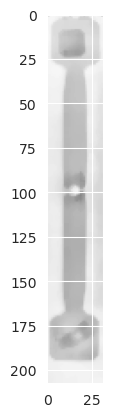

In [283]:
inv = (255 - im_full_gray_resized)
inv_filt = cv2.medianBlur(inv, 5)

plt.imshow(inv_filt, cmap='gray', vmin=0, vmax=255)

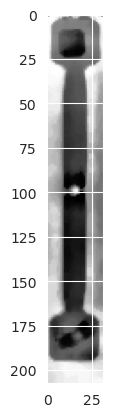

In [284]:
inv_filt_cont = cv2.equalizeHist(inv_filt)
plt.imshow(inv_filt_cont, cmap='gray', vmin=0, vmax=255)


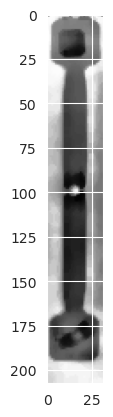

In [285]:
inv_cont = cv2.equalizeHist(inv)
plt.imshow(inv_cont, cmap='gray', vmin=0, vmax=255)
inv_cont_filt = cv2.medianBlur(inv_cont, 5)
plt.imshow(inv_cont_filt, cmap='gray', vmin=0, vmax=255)


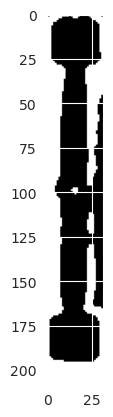

In [286]:
ret, bin = cv2.threshold(cont,100,255,cv2.THRESH_BINARY_INV)

plt.imshow(bin, cmap='gray', vmin=0, vmax=255)


In [287]:
im_full_gray_resized = cv2.resize(im_full_gray, (int(im_full_gray.shape[1] / rescaling_factor),
                                                 int(im_full_gray.shape[0] / rescaling_factor)),
                                  interpolation=cv2.INTER_AREA)

filt = cv2.medianBlur(im_full_gray_resized, 5)
cont = cv2.equalizeHist(filt)


inv = (255 - im_full_gray_resized)
inv_filt = cv2.medianBlur(inv, 5)

inv_filt_cont = cv2.equalizeHist(inv_filt)

ret, bin = cv2.threshold(cont,100,255,cv2.THRESH_BINARY_INV)


rows = bin.shape[0]
circles = cv2.HoughCircles(bin, cv2.HOUGH_GRADIENT, 1, rows / 8,
                           param1=255, param2=7,
                           minRadius=0, maxRadius=4)


In [288]:

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle center
        cv2.circle(im_full_gray_resized, center, 1, (0, 100, 100), 3)
        # circle outline
        radius = i[2]
        cv2.circle(im_full_gray_resized, center, radius, (255, 0, 255), 3)

cv2.imshow("detected circles", im_full_gray_resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x7fce08001220) is not the object's thread (0x46e83e0).
Cannot move to target thread (0x7fce08001220)

QObject::moveToThread: Current thread (0x7fce08001220) is not the object's thread (0x46e83e0).
Cannot move to target thread (0x7fce08001220)

QObject::moveToThread: Current thread (0x7fce08001220) is not the object's thread (0x46e83e0).
Cannot move to target thread (0x7fce08001220)

QObject::moveToThread: Current thread (0x7fce08001220) is not the object's thread (0x46e83e0).
Cannot move to target thread (0x7fce08001220)

QObject::moveToThread: Current thread (0x7fce08001220) is not the object's thread (0x46e83e0).
Cannot move to target thread (0x7fce08001220)

QObject::moveToThread: Current thread (0x7fce08001220) is not the object's thread (0x46e83e0).
Cannot move to target thread (0x7fce08001220)

QObject::moveToThread: Current thread (0x7fce08001220) is not the object's thread (0x46e83e0).
Cannot move to target thread (0x7fce08001220)

QObjec

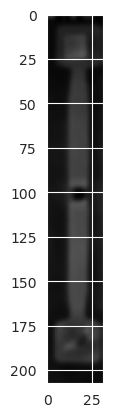

In [384]:
im_full_gray_resized = cv2.resize(im_full_gray, (int(im_full_gray.shape[1] / rescaling_factor),
                                                 int(im_full_gray.shape[0] / rescaling_factor)),
                                  interpolation=cv2.INTER_AREA)
# Erode and dilate kernel to remove small noise that could be detected as ball

kernel= np.ones((2,2), np.uint8)
denoised = cv2.erode(im_full_gray_resized, kernel, iterations = 3)
denoised = cv2.dilate(denoised, kernel, iterations = 1)
# Reduce the noise to avoid false circle detection

filt = cv2.GaussianBlur(denoised, (5,5), 0)

plt.imshow(filt, cmap='gray', vmin=0, vmax=255)

rows = filt.shape[0]
circles = cv2.HoughCircles(filt, cv2.HOUGH_GRADIENT, 1, 125,
                           param1=40, param2=12,
                           minRadius=0, maxRadius=10)

In [385]:
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle center
        cv2.circle(im_full_gray_resized, center, 1, (0, 100, 100), 3)
        # circle outline
        radius = i[2]
        cv2.circle(im_full_gray_resized, center, radius, (255, 0, 255), 3)
cv2.imshow("detected circles", im_full_gray_resized)
cv2.waitKey(0)
cv2.destroyAllWindows()
#Adapted parameters from first video with more erosion to get rid of legs and had to reduce param2 accordingly

QObject::moveToThread: Current thread (0x7fce08001220) is not the object's thread (0x46e83e0).
Cannot move to target thread (0x7fce08001220)

QObject::moveToThread: Current thread (0x7fce08001220) is not the object's thread (0x46e83e0).
Cannot move to target thread (0x7fce08001220)

QObject::moveToThread: Current thread (0x7fce08001220) is not the object's thread (0x46e83e0).
Cannot move to target thread (0x7fce08001220)

QObject::moveToThread: Current thread (0x7fce08001220) is not the object's thread (0x46e83e0).
Cannot move to target thread (0x7fce08001220)

QObject::moveToThread: Current thread (0x7fce08001220) is not the object's thread (0x46e83e0).
Cannot move to target thread (0x7fce08001220)

QObject::moveToThread: Current thread (0x7fce08001220) is not the object's thread (0x46e83e0).
Cannot move to target thread (0x7fce08001220)

QObject::moveToThread: Current thread (0x7fce08001220) is not the object's thread (0x46e83e0).
Cannot move to target thread (0x7fce08001220)

QObjec

# Test with a third video and new params

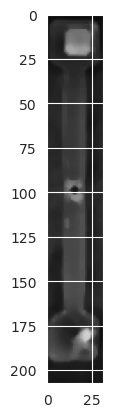

In [386]:
PathTemp = Path(
    "/mnt/labserver/DURRIEU_Matthias/Experimental_data/TrackingFiles/BackgroundImages/outer_arena_MultinazeBiS_Spacer/MultiMazeBiS_Empty/Spacer/221206/095129_s0a0_p6-0/Sample/MultiMaze_Spacer_Template.jpg")
VideoPath = Path(
    '/mnt/labserver/DURRIEU_Matthias/Experimental_data/Optogenetics/Optobot/MultiMazeBiS_15_Steel_Wax/Female_Starved_noWater/221116/102044_s0a0_p6-0/Small_Arena3/Arena3.mp4')
vidcap = cv2.VideoCapture(VideoPath.as_posix())
for i in range(1):
    success, im_full = vidcap.read()

im_full_gray = cv2.cvtColor(im_full, cv2.COLOR_BGR2GRAY)

plt.figure()
plt.imshow(im_full_gray, cmap='gray', vmin=0, vmax=255)

im_full_gray_resized = cv2.resize(im_full_gray, (int(im_full_gray.shape[1] / rescaling_factor),
                                                 int(im_full_gray.shape[0] / rescaling_factor)),
                                  interpolation=cv2.INTER_AREA)

filt = cv2.medianBlur(im_full_gray_resized, 5)

plt.imshow(filt, cmap='gray', vmin=0, vmax=255)
im_full_gray_resized = cv2.resize(im_full_gray, (int(im_full_gray.shape[1] / rescaling_factor),
                                                 int(im_full_gray.shape[0] / rescaling_factor)),
                                  interpolation=cv2.INTER_AREA)

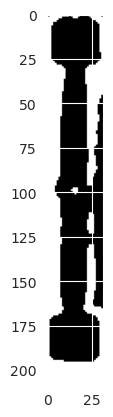

In [290]:
plt.imshow(bin, cmap='gray', vmin=0, vmax=255)


In [293]:

filt = cv2.medianBlur(im_full_gray_resized, 5)
cont = cv2.equalizeHist(filt)

inv = (255 - im_full_gray_resized)
inv_filt = cv2.medianBlur(inv, 5)

inv_filt_cont = cv2.equalizeHist(inv_filt)

ret, bin = cv2.threshold(cont, 100, 255, cv2.THRESH_BINARY_INV)

rows = bin.shape[0]
circles = cv2.HoughCircles(bin, cv2.HOUGH_GRADIENT, 1, rows / 8,
                           param1=255, param2=7,
                           minRadius=0, maxRadius=1)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle center
        cv2.circle(im_full_gray_resized, center, 1, (0, 100, 100), 3)
        # circle outline
        radius = i[2]
        cv2.circle(im_full_gray_resized, center, radius, (255, 0, 255), 3)

cv2.imshow("detected circles", im_full_gray_resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x7fce08001220) is not the object's thread (0x46e83e0).
Cannot move to target thread (0x7fce08001220)

QObject::moveToThread: Current thread (0x7fce08001220) is not the object's thread (0x46e83e0).
Cannot move to target thread (0x7fce08001220)

QObject::moveToThread: Current thread (0x7fce08001220) is not the object's thread (0x46e83e0).
Cannot move to target thread (0x7fce08001220)

QObject::moveToThread: Current thread (0x7fce08001220) is not the object's thread (0x46e83e0).
Cannot move to target thread (0x7fce08001220)

QObject::moveToThread: Current thread (0x7fce08001220) is not the object's thread (0x46e83e0).
Cannot move to target thread (0x7fce08001220)

QObject::moveToThread: Current thread (0x7fce08001220) is not the object's thread (0x46e83e0).
Cannot move to target thread (0x7fce08001220)

QObject::moveToThread: Current thread (0x7fce08001220) is not the object's thread (0x46e83e0).
Cannot move to target thread (0x7fce08001220)

QObjec

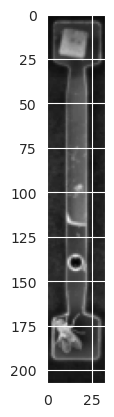

In [297]:
plt.imshow(im_full_gray_resized, cmap='gray', vmin=0, vmax=255)


In [ ]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    blurFrame = cv2.GaussianBlur(gray, (5, 5), 0)   #(5,5) is the kernel size, more or less blur

    circles = cv2.HoughCircles(blurFrame, cv2.HOUGH_GRADIENT, 1, 125, param1=40, param2=30, minRadius=10, maxRadius=30) #fourth argument distance between centers of circles
    #list of circles found are stored in circles                          param1 is sensitivity, if two high will detect not many circles, too low will detect too many circles
                                                                            #param2 is the minimum number of edges, the higher the more accurate the circle detection

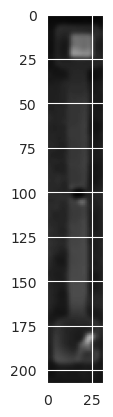

In [389]:
im_full_gray_resized = cv2.resize(im_full_gray, (int(im_full_gray.shape[1] / rescaling_factor),
                                                 int(im_full_gray.shape[0] / rescaling_factor)),
                                  interpolation=cv2.INTER_AREA)
# Erode and dilate kernel to remove small noise that could be detected as ball

kernel= np.ones((2,2), np.uint8)
denoised = cv2.erode(im_full_gray_resized, kernel, iterations = 3)
denoised = cv2.dilate(denoised, kernel, iterations = 1)
# Reduce the noise to avoid false circle detection

filt = cv2.GaussianBlur(denoised, (5,5), 0)

plt.imshow(filt, cmap='gray', vmin=0, vmax=255)

rows = filt.shape[0]
circles = cv2.HoughCircles(filt, cv2.HOUGH_GRADIENT, 1, 125,
                           param1=40, param2=11,
                           minRadius=0, maxRadius=10)

In [390]:
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle center
        cv2.circle(im_full_gray_resized, center, 1, (0, 100, 100), 3)
        # circle outline
        radius = i[2]
        cv2.circle(im_full_gray_resized, center, radius, (255, 0, 255), 3)
cv2.imshow("detected circles", im_full_gray_resized)
cv2.waitKey(0)
cv2.destroyAllWindows()
#Adapted parameters from first video with more erosion to get rid of legs and had to reduce param2 accordingly

QObject::moveToThread: Current thread (0x7fce08001220) is not the object's thread (0x46e83e0).
Cannot move to target thread (0x7fce08001220)

QObject::moveToThread: Current thread (0x7fce08001220) is not the object's thread (0x46e83e0).
Cannot move to target thread (0x7fce08001220)

QObject::moveToThread: Current thread (0x7fce08001220) is not the object's thread (0x46e83e0).
Cannot move to target thread (0x7fce08001220)

QObject::moveToThread: Current thread (0x7fce08001220) is not the object's thread (0x46e83e0).
Cannot move to target thread (0x7fce08001220)

QObject::moveToThread: Current thread (0x7fce08001220) is not the object's thread (0x46e83e0).
Cannot move to target thread (0x7fce08001220)

QObject::moveToThread: Current thread (0x7fce08001220) is not the object's thread (0x46e83e0).
Cannot move to target thread (0x7fce08001220)

QObject::moveToThread: Current thread (0x7fce08001220) is not the object's thread (0x46e83e0).
Cannot move to target thread (0x7fce08001220)

QObjec

# Tests with canny edge detection : param1 and param2 from hough circles is basicall same as canny edges

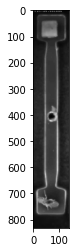

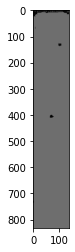

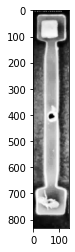

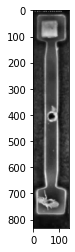

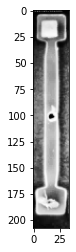

In [3]:
# Mac paths :

VideoPath = Path("/Users/ulric/Desktop/SampleDataMMTrack/Small_Arena2/Arena2.mp4")
vidcap = cv2.VideoCapture(VideoPath.as_posix())
for i in range(1):
    success, im_full = vidcap.read()

im_full_gray = cv2.cvtColor(im_full, cv2.COLOR_BGR2GRAY)

plt.figure()
plt.imshow(im_full_gray, cmap='gray', vmin=0, vmax=255)

# Tryin uniform lighting
# Nathan solution
im_full_gray_unif = uniform_illumination(im_full_gray, bin_thresh=10)

plt.figure()
plt.imshow(im_full_gray_unif, cmap='gray', vmin=0, vmax=255)
# equalize hist

im_full_gray_eqh = cv2.equalizeHist(im_full_gray,)

plt.figure()
plt.imshow(im_full_gray_eqh, cmap='gray', vmin=0, vmax=255)

# Adaptive equalization

clahe = cv2.createCLAHE(clipLimit=2.0,
                        tileGridSize=(8,8))
im_full_gray_clahe = clahe.apply(im_full_gray,)

plt.figure()
plt.imshow(im_full_gray_clahe, cmap='gray', vmin=0, vmax=255)


im_full_gray_resized = cv2.resize(im_full_gray_eqh, (int(im_full_gray.shape[1] / rescaling_factor),
                                                 int(im_full_gray.shape[0] / rescaling_factor)),
                                  interpolation=cv2.INTER_AREA)

plt.figure()
plt.imshow(im_full_gray_resized, cmap='gray', vmin=0, vmax=255)

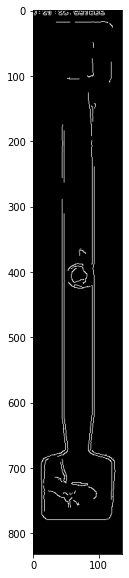

In [33]:
filtered = cv2.GaussianBlur(im_full_gray, (5,5), 0)
edges = cv2.Canny(im_full_gray, 200, 150)
plt.figure(figsize=(20,10))
plt.imshow(edges, cmap='gray', vmin=0, vmax=255)

In [ ]:
# Chat gpt solutions

import cv2

# Load the video
video = cv2.VideoCapture("path/to/video.mp4")

# Create a tracker object
tracker = cv2.TrackerKCF_create()

# Read the first frame of the video
success, frame = video.read()

# If the frame was read successfully, we can use it to set the initial
# position of the tracker
if success:
    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Use the Canny edge detector to detect edges in the frame
    edges = cv2.Canny(gray, 100, 200)

    # Find contours in the edge map
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Select the contour with the largest area
    contour = max(contours, key=cv2.contourArea)

    # Use the contour to approximate a circle
    (x, y), radius = cv2.minEnclosingCircle(contour)

    # Create a bounding box for the circle
    bbox = (x - radius, y - radius, 2 * radius, 2 * radius)

    # Initialize the tracker with the bounding box
    tracker.init(frame, bbox)

# Loop through the remaining frames of the video
while video.isOpened():
    # Read the next frame
    success, frame = video.read()

    # If the frame was read successfully
    if success:
        # Update the tracker
        success, bbox = tracker.update(frame)

        # If the tracker was updated successfully
        if success:
            # Draw the bounding box around the circle
            p1 = (int(bbox[0]), int(bbox[1]))
            p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
            cv2.rectangle(frame, p1, p2, (255, 0, 0), 2, 1)

        # Show the frame
        cv2.imshow("Tracking", frame)

        # Wait for a key press
        key = cv2.waitKey(1)
        if key == 27: # Escape key
            break

# Release the video capture object and close all windows
video.release()
cv2.destroyAllWindows()



# BackgroundSub

In [305]:
file = VideoPath

input_vidpath = file.as_posix()
output_vidpath = str(file).replace(file.stem, file.stem + "_tracked")
codec = "mp4v"

fgbg5 = cv2.bgsegm.createBackgroundSubtractorGSOC(
)

cap = cv2.VideoCapture(input_vidpath)

scaling = 1.0

# Set framesize as the same one as the images read from input video
BG_framesize = (
    int(cap.read()[1].shape[1] * scaling),
    int(cap.read()[1].shape[0] * scaling),
)

fourcc = cv2.VideoWriter_fourcc(*codec)
# Create a Video writer with the desired parameters
Background_Generator = cv2.VideoWriter(
    filename=file.parent.joinpath("Background_Generator2.mp4").as_posix(),
    fourcc=fourcc,
    fps=80,
    frameSize=BG_framesize,
    # isColor=True,
)

# Write a video with random frames taken in the input video
f = 0
while f <= 300:
    # get total number of frames
    totalFrames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
    randomFrameNumber = random.randint(0, totalFrames)
    # set frame position
    cap.set(cv2.CAP_PROP_POS_FRAMES, randomFrameNumber)
    success, image = cap.read()

    if success:

        Background_Generator.write(image)

    f += 1

cap.release()
Background_Generator.release()
cv2.destroyAllWindows()

# Adjust using live rendering to get a clean background image. Default : 500

cap = cv2.VideoCapture(file.parent.joinpath( "Background_Generator2.mp4").as_posix())

target = 0
cap.set(
    1, target
)  # Set the starting point, try to find a section where the fly moves a lot.

Frame = target + 300

while 1:
    # read frames
    ret, img = cap.read()
    this = cap.get(1)

    # apply mask for background subtraction
    # fgbg5 is a GSOC background subtraction algorithm
    fgmask5 = fgbg5.apply(img)

    bg = fgbg5.getBackgroundImage()

    #cv2.imshow("Original", img)
    #cv2.imshow("GSOC", fgmask5)
    #cv2.imshow("background", bg)
    subtracted = cv2.absdiff(img, bg)

    if this == Frame:

        cv2.imwrite(file.parent.joinpath(file.stem+"_Background.jpg").as_posix(), bg)
        break

    k = cv2.waitKey(30) & 0xFF
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

file.parent.joinpath("Background_Generator2.mp4").unlink()

In [ ]:
#ChatGPT ImJ pluggin and template matching


To write a tracking algorithm using python and Fiji template matching, you will need to do the following:

1) Install Fiji and Python on your computer. You can download Fiji from the ImageJ website and Python from the Python website.

2) Open Fiji and go to the Plugins menu. Select the "Macros" option and then choose "New" to create a new macro.

3) In the macro editor, type the following code to import the necessary libraries and define a function for template matching:

In [ ]:
# Import the necessary libraries
from ij import IJ
from ij.process import ImageProcessor
from ij.process import FloatProcessor

# Define a function for template matching
def templateMatch(imp, template):
  # Get the image data from the ImagePlus object
  ip = imp.getProcessor()

  # Create a new image processor to store the result of the template matching
  result = ImageProcessor(ip.getWidth(), ip.getHeight())

  # Perform template matching using the "normalized cross-correlation" method
  result.setValue(0)
  result.fill()
  result.setValue(1)
  result.draw(template)
  result.setRoi(template)
  ip.setRoi(template)
  ncc = ip.getStatistics().correlation(result)

  # Return the result of the template matching
  return ncc


4) To use this function, you will need to provide it with an ImagePlus object and a template image. You can create an ImagePlus object from a file using the following code:

In [ ]:
# Open the image file and get the ImagePlus object
imp = IJ.openImage("path/to/image/file.jpg")


5) You can create a template image by selecting a region of interest in the image and copying it to a new image processor. For example, the following code creates a template image that is 100 pixels wide and 100 pixels tall, starting at the coordinates (200, 200) in the original image:

In [ ]:
# Define the dimensions and position of the template
templateWidth = 100
templateHeight = 100
templateX = 200
templateY = 200

# Create a new image processor for the template
template = ImageProcessor(templateWidth, templateHeight)

# Copy the region of interest from the original image to the template
ip.setRoi(templateX, templateY, templateWidth, templateHeight)
template.insert(ip, 0, 0)


6) Once you have the ImagePlus object and the template image, you can call the templateMatch() function to perform the template matching. The function will return a value between 0 and 1, where a higher value indicates a better match between the template and the image.

# Other Fiji option?

1) First, you will need to import the necessary libraries and modules. This will include Fiji, Python's built-in math module, and the cv2 module for computer vision tasks.

In [ ]:

import fiji
import math
import cv2


2) Next, you will need to load the template image that you want to use for tracking. You can use Fiji's ImagePlus class to open the image file and store it in a variable.

In [ ]:

template = fiji.ImagePlus("template.png")


3) Once you have the template image, you can use the matchTemplate function from the cv2 module to perform template matching on the target image. This function takes the target image and the template image as arguments and returns a matrix of matching scores for each location in the target image.

In [ ]:

target = fiji.ImagePlus("target.png")
result = cv2.matchTemplate(target, template, cv2.TM_CCOEFF_NORMED)


4) The matchTemplate function returns a matrix of matching scores, where higher values indicate a better match. You can use Python's math module to find the location of the maximum score, which corresponds to the location of the best match in the target image.

In [ ]:

_, _, _, max_loc = cv2.minMaxLoc(result)


5) Finally, you can use the coordinates of the maximum score to draw a rectangle around the matched template in the target image. You can do this using the rectangle function from the cv2 module, which takes the target image, the top-left and bottom-right coordinates of the rectangle, and the color of the rectangle as arguments.

In [ ]:

w, h = template.size
rect_top_left = (max_loc[0], max_loc[1])
rect_bottom_right = (max_loc[0] + w, max_loc[1] + h)
cv2.rectangle(target, rect_top_left, rect_bottom_right, (0, 255, 0), 2)

6) You can then display the target image with the rectangle drawn around the matched template using the show function from the cv2 module.

# Third try

1) Import the necessary libraries, including the Fiji library for template matching.
Copy code

In [ ]:
import fiji
from skimage import io
import numpy as np

2) Load the template image and the video frame in which you want to track the object.
Copy code

In [ ]:
# Load the template image
template = io.imread('template.png')

# Load the video frame
frame = io.imread('frame.png')


3) Use the fiji.match_template() function to perform template matching and find the location of the object in the video frame.

In [ ]:
# Perform template matching
result = fiji.match_template(frame, template)

# Find the location of the object in the video frame
loc = np.where(result >= 0.9)


4) Use the coordinates of the object to draw a bounding box around it in the video frame.
Copy code

In [ ]:
# Draw a bounding box around the object
for pt in zip(*loc[::-1]):
    cv2.rectangle(frame, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)



5) Repeat steps 3 and 4 for each frame in the video to track the object over time.

In [ ]:

while True:
    # Load the next video frame
    frame = io.imread('frame.png')

    # Perform template matching and draw a bounding box around the object
    result = fiji.match_template(frame, template)
    loc = np.where(result >= 0.9)
    for pt in zip(*loc[::-1]):
        cv2.rectangle(frame, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

    # Show the video frame
    cv2.imshow('Frame', frame)

    # Check if the user pressed the 'q' key to quit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break


6) This is a very simple tracking algorithm, and there are many ways it could be improved. For example, you could use a more sophisticated method for template matching, such as cross-correlation, or you could use a more advanced object tracking algorithm, such as Kalman filtering or meanshift tracking.

# Improve circle detection through ROI selection

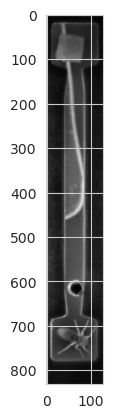

In [38]:
VideoPath = Path(
    '/mnt/labserver/DURRIEU_Matthias/Experimental_data/Optogenetics/Optobot/MultiMazeBiS_15_Steel_Wax/Female_Starved_noWater/221116/102044_s0a0_p6-0/Small_Arena6/Arena6.mp4')

vidcap = cv2.VideoCapture(VideoPath.as_posix())
for i in range(1):
    success, im_full = vidcap.read()

im_full_gray = cv2.cvtColor(im_full, cv2.COLOR_BGR2GRAY)

plt.figure()
plt.imshow(im_full_gray, cmap='gray', vmin=0, vmax=255)

<BarContainer object of 832 artists>

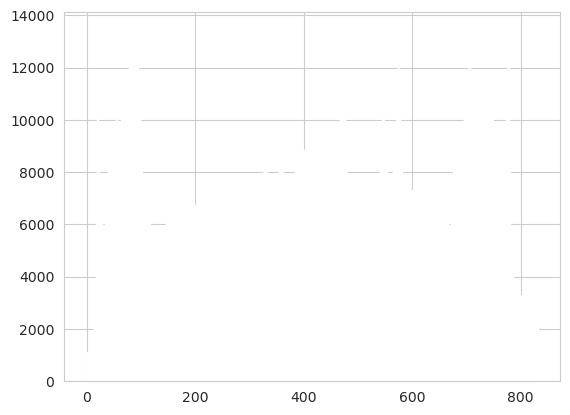

In [28]:
cols = im_full_gray.sum(axis=0)
rows = im_full_gray.sum(axis=1)
plt.bar(x=range(0, len(rows)), height=rows)
#plt.bar(x=range(0, len(cols)), height=cols)

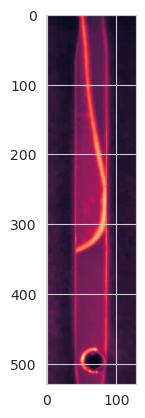

In [39]:
cropped = im_full_gray[120:650,:] # Note that this is arbitrary but shouldn't move from one arena to the other.
plt.imshow(cropped)

Do a simple hough transform on cropped image

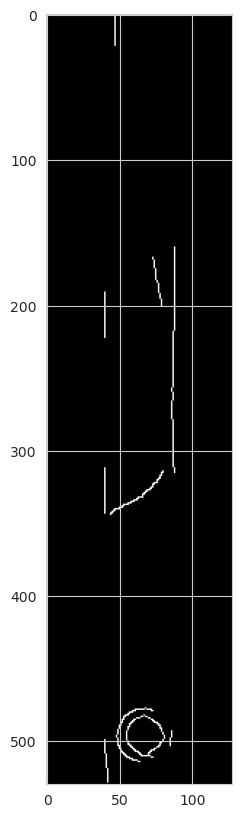

In [40]:
filtered = cv2.medianBlur(cropped,5)
edges = cv2.Canny(filtered, 255, 200)
plt.figure(figsize=(20,10))
plt.imshow(edges, cmap='gray', vmin=0, vmax=255)

In [41]:
circles = cv2.HoughCircles(filtered, cv2.HOUGH_GRADIENT, 1, 125,
                           param1=255, param2=40,
                           minRadius=10, maxRadius=20)

#circles = np.uint16(np.around(circles))

In [42]:

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle center
        cv2.circle(cropped, center, 1, (255, 0, 255), 3)
        # circle outline
        radius = i[2]
        cv2.circle(cropped, center, radius, (255, 0, 255), 3)
cv2.imshow("detected circles", cropped)
cv2.waitKey(0)
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x7f1354003140) is not the object's thread (0x36a6750).
Cannot move to target thread (0x7f1354003140)

QObject::moveToThread: Current thread (0x7f1354003140) is not the object's thread (0x36a6750).
Cannot move to target thread (0x7f1354003140)

QObject::moveToThread: Current thread (0x7f1354003140) is not the object's thread (0x36a6750).
Cannot move to target thread (0x7f1354003140)

QObject::moveToThread: Current thread (0x7f1354003140) is not the object's thread (0x36a6750).
Cannot move to target thread (0x7f1354003140)

QObject::moveToThread: Current thread (0x7f1354003140) is not the object's thread (0x36a6750).
Cannot move to target thread (0x7f1354003140)

QObject::moveToThread: Current thread (0x7f1354003140) is not the object's thread (0x36a6750).
Cannot move to target thread (0x7f1354003140)

QObject::moveToThread: Current thread (0x7f1354003140) is not the object's thread (0x36a6750).
Cannot move to target thread (0x7f1354003140)

QObjec

In [46]:
BallPos = list()

Vidcap = cv2.VideoCapture(VideoPath.as_posix())

last = 0

while True:
    ret, frame = Vidcap.read() # Grab frame
    this = Vidcap.get(1)
    if ret == True:

        #frame = cv2.resize(frame, None, fx=scaling, fy=scaling,
        #interpolation=cv2.INTER_LINEAR)

        im_full_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) # convert to grayscale
        cropped = im_full_gray[120:650,:]



        #im_full_gray_resized = cv2.resize(im_full_gray, (int(im_full_gray.shape[1] / rescaling_factor),
         #                                                int(im_full_gray.shape[0] / rescaling_factor)),
          #                                interpolation=cv2.INTER_AREA)
                # (height, width) = frame.shape[:2]

        #filt = cv2.GaussianBlur(im_full_gray_resized, (5,5), 0)
        filtered = cv2.medianBlur(cropped,5)

        param1=200
        param2=30



        #rows = filt.shape[0]
        circles = cv2.HoughCircles(filtered, cv2.HOUGH_GRADIENT, 1, 125,
                                   param1=param1, param2=param2,
                                   minRadius=10, maxRadius=20)

        if circles is not None:
            circles = np.uint16(np.around(circles))
            for i in circles[0, :]:
                center = (i[0], i[1])
                BallPos.append(center)
                # circle center
                cv2.circle(cropped, center, 1, (255, 0, 255), 3)
                # circle outline
                radius = i[2]
                #cv2.circle(cropped, center, radius, (255, 0, 255), 3)
        cv2.imshow("detected circles", cropped)



        if cv2.waitKey(1) == 27:
            exit(0)
    if last >= this:
        break
    last = this
Vidcap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

QObject::moveToThread: Current thread (0x7f1354003140) is not the object's thread (0x36a6750).
Cannot move to target thread (0x7f1354003140)

QObject::moveToThread: Current thread (0x7f1354003140) is not the object's thread (0x36a6750).
Cannot move to target thread (0x7f1354003140)

QObject::moveToThread: Current thread (0x7f1354003140) is not the object's thread (0x36a6750).
Cannot move to target thread (0x7f1354003140)

QObject::moveToThread: Current thread (0x7f1354003140) is not the object's thread (0x36a6750).
Cannot move to target thread (0x7f1354003140)

QObject::moveToThread: Current thread (0x7f1354003140) is not the object's thread (0x36a6750).
Cannot move to target thread (0x7f1354003140)

QObject::moveToThread: Current thread (0x7f1354003140) is not the object's thread (0x36a6750).
Cannot move to target thread (0x7f1354003140)

QObject::moveToThread: Current thread (0x7f1354003140) is not the object's thread (0x36a6750).
Cannot move to target thread (0x7f1354003140)

QObjec

-1